In [41]:
%load_ext autoreload
%autoreload 2

import gym
import numpy as np
from crossentropy_method import CrossEntropyMethod
from IPython.display import clear_output
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [13]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [50]:
def generate_session(env, policy, t_max=10**4,render_session=False):
    """
    Play game until end or for t_max ticks.
    :param policy: an array of shape [n_states,n_actions] with action probabilities
    :returns: list of states, list of actions and sum of rewards
    """
    states, actions = [], []
    total_reward = 0.

    s = env.reset()

    for _ in range(t_max):
        a = np.random.choice(np.arange(n_actions),p=policy[s])

        new_s, r, done, _ = env.step(a)

        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if render_session:
            env.render()
            clear_output(True)
            time.sleep(0.5)
        if done:
            break

    return states, actions, total_reward

In [46]:
cem.session_generator_fn=generate_session

mean reward = -5.292, threshold=3.700


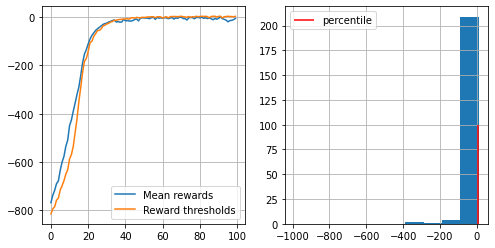

In [15]:
cem=CrossEntropyMethod(env=env,session_generator_fn=generate_session,n_states=n_states,n_actions=n_actions)
cem.train()

In [16]:
sessions=cem.evaluate_policy()
_, _, session_rewards = zip(*sessions)
mean_reward = np.mean(session_rewards)
print(f'Session mean reward:{np.mean(mean_reward)}')

Session mean reward:-12.008


In [49]:
cem.render_policy()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
